<a href="https://colab.research.google.com/github/AnIsAsPe/ClasificadorClientesTelecom/blob/master/Generador_n%C3%BAmeros_aleatorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generador de (pseudo) números aleatorios mediante el algoritmo de congruencia lineal (GCL) y transformación Box-Muller





## 1. Generador Congruencia Lineal

$X_{n+1} = (aX_n + b)\bmod c$

donde $ a $ (el multiplicador),  $ b $  (el incremento) y $ c $  (módulo) son parámetros enteros del generador fijados de antemano.

In [1]:
import pandas as pd
import numpy as np
from numpy import sqrt, log, sin, cos, pi
import seaborn as sns
import matplotlib.pyplot as plt

###¿Cuántos números se generan antes de que se repita la secuencia?
###¿Cada numero de la serie generada es independiente de los otros?
¿qué relación tiene con el valor de los parámetros a, b y m?

In [2]:
def genera_aleatorios(a =  1, b = 8, 
                      m = 10):
  ''' Genera números aleatorios mediante el algoritmo de congruencia lineal
  a, es el multiplicador
  b, es el incremento 
  c, es el módulo
  '''
  genera_aleatorios.X = (a*genera_aleatorios.X + b) % m
  return genera_aleatorios.X 

In [3]:
genera_aleatorios.X = 1

n = 20
datos = [genera_aleatorios() for i in range(n)]
datos

[9, 7, 5, 3, 1, 9, 7, 5, 3, 1, 9, 7, 5, 3, 1, 9, 7, 5, 3, 1]

No es trivial la elección de parámetros.

Se deben asegurar ciclos muy largos y que no existan autocorrelación en los datos.

La longitud de un ciclo tiene como tope m, pero puede ser menor en base a la eleccion de a y b

In [4]:
def genera_aleatorios(a =  1103515245, b = 12345, 
                      m = (2**32)):
  ''' Genera números aleatorios mediante el algoritmo de congruencia lineal
  a, es el multiplicador
  b, es el incremento 
  c, es el módulo

  por defecto a, b y c se han elegido de manera que satisfacen el Teorema
  Hull-Dobell, según el cual este algoritmo tendra un periodo completo 
  igual a m si y solo si:
  b y m son primos relativos
  a-1 es divisible por todos los factores primos de m
  a-1 es multiplo de 4 si m es multiplo de 4
  '''
  genera_aleatorios.X = (a*genera_aleatorios.X + b) % m
  return genera_aleatorios.X / m
   


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


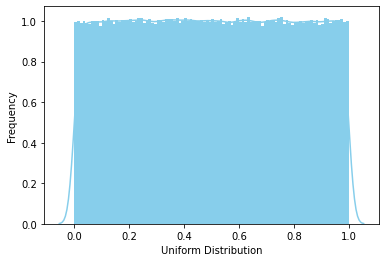

In [5]:
#genera_aleatorios.X = .5  #cualquier número entero mayor que 0
genera_aleatorios.X = 1

n = 1000000
var = [genera_aleatorios() for i in range(n)]

gr1=sns.distplot(var, bins=100, kde=True, color='skyblue', 
                 hist_kws={'linewidth':15,'alpha':1})
gr1.set(xlabel='Uniform Distribution', ylabel='Frequency')
plt.show()

## 2. Transformación Box - Muller


$z_1 = r\cos(\theta) =  \sqrt{-2ln(x_1)}\cos(2\pi x_1)$

$z_2 =  r\sin(\theta) =\sqrt{-2ln(x_1)}\sin(2\pi x_1)$

In [6]:
def transformacion_gaussiana(u1,u2):
  ''' función para transformar dos variables independientes
   con valores entre 0 y 1 con distribución uniforme, a dos variables 
   independientes con distribución gaussiana, utilizando la transformación
   Box-Muller'''

  r = sqrt(-2*log(u1))
  theta = 2*pi*u2
  
  x = r * cos(theta)
  y = r * sin(theta)

  return x, y

La media de x es 0.00, y la desviación estándar es: 1.00
La media de x es 0.01, y la desviación estándar es: 1.01


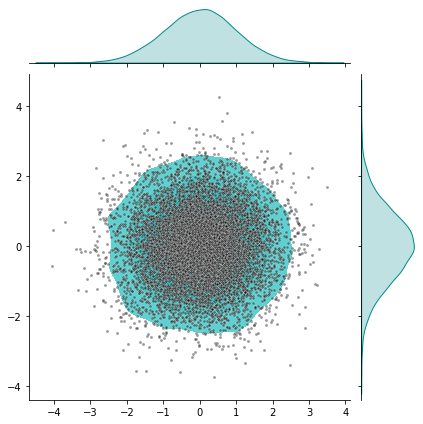

In [43]:
n = 10000

var_u1 = np.array([genera_aleatorios() for i in range(n)])
var_u2 = np.array([genera_aleatorios() for i in range(n)])


x, y = transformacion_gaussiana(var_u1, var_u2)

print('La media de x es {0:.2f},'\
      ' y la desviación estándar es: {1:.2f}'.format(x.mean(), x.std()))
print('La media de x es {0:.2f},'\
      ' y la desviación estándar es: {1:.2f}'.format(y.mean(), y.std()))

g = sns.jointplot(x=x, y=y, 
                  kind = 'kde', fill=True, 
                  color = 'darkcyan')
g.plot_joint(sns.scatterplot, marker='.', color='black', alpha=.4)
plt.show()

In [39]:
import scipy.stats as st

In [34]:
deltaX = (max(x)-min(x))/10
deltaX, max(x), min(x)

(1.0, 5.0, -5.0)

In [37]:
deltaY = (max(y)-min(y))/10
deltaY,  max(y), min(y)

(1.0, 5.0, -5.0)

In [42]:
X, Y = np.meshgrid(x, y)
datos =np.vstack([x, y])
kernel = st.gaussian_kde(datos)
f = np.reshape(kernel())

#Z = multivariate_normal(mu, cov)

LinAlgError: ignored

In [ ]:
cov

In [26]:


fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
x = np.linspace(-5, 5, 200)
y = x
X,Y = np.meshgrid(x, y)
Z = bivariate_normal(X, Y)
surf = ax.plot_surface(X, Y, Z, rstride=1,
        cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False
    )

ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('Bivariate Gaussian distribution')
fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

plt.show()

ImportError: ignored